In [1]:
# Figure X - Modelling

from numpy import array, ndarray
from pandas import read_csv, DataFrame

file_tag = "modelling_churn"
#index_col = "id"
target = "Churn"
filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\data_science\\data\\churn__smote.csv"
# data: DataFrame = read_csv(filename)
data: DataFrame = read_csv(filename, index_col="Unnamed: 0")
print(data.head())

              tenure  InternetService  PaymentMethod  MonthlyCharges  \
Unnamed: 0                                                             
0.0         0.013889              0.5       0.333333        0.116935   
1.0         0.472222              0.5       0.000000        0.390121   
2.0         0.027778              0.5       0.000000        0.358871   
3.0         0.625000              0.5       0.666667        0.242440   
4.0         0.027778              1.0       0.333333        0.528730   

            Cost/service  SecurityCost  StreamingCost  TotalCharges  gender  \
Unnamed: 0                                                                    
0.0             0.002667      0.009131            0.0      0.001643     1.0   
1.0             0.438544      0.385324            0.0      0.278181     0.0   
2.0             0.011253      0.033082            0.0      0.013287     0.0   
3.0             0.427025      0.375382            0.0      0.270932     0.0   
4.0             0.027

In [2]:


labels: list = list(data[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data[data[target] == negative]),
        len(data[data[target] == positive]),
    ]
}

y: array = data.pop(target).to_list()
X: ndarray = data.values


Labels=[np.int64(0), np.int64(1)]


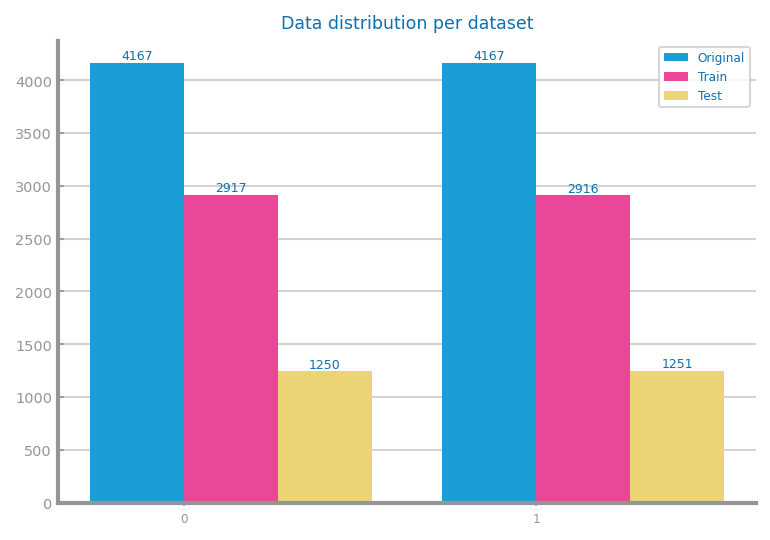

In [3]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data.columns), DataFrame(trnY, columns=[target])], axis=1
)
train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data.columns), DataFrame(tstY, columns=[target])], axis=1
)
test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [5]:
from pandas import read_csv


def read_train_test_from_files(
    train_fn: str, test_fn: str, target: str = "class"
) -> tuple[ndarray, ndarray, array, array, list, list]:
    train: DataFrame = read_csv(train_fn, index_col=None)
    labels: list = list(train[target].unique())
    labels.sort()
    trnY: array = train.pop(target).to_list()
    trnX: ndarray = train.values

    test: DataFrame = read_csv(test_fn, index_col=None)
    tstY: array = test.pop(target).to_list()
    tstX: ndarray = test.values
    return trnX, tstX, trnY, tstY, labels, train.columns.to_list()

file_tag = "modelling_churn"
train_filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\data_science\\data\\modelling_churn_train.csv"
test_filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\data_science\\data\\modelling_churn_test.csv"
target = "Churn"
eval_metric = "accuracy"

trnX: ndarray
tstX: ndarray
trnY: array
tstY: array
labels: list
vars: list
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=5833 Test#=2501
Labels=[np.int64(0), np.int64(1)]


In [6]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.734
Score over Test: 0.743


In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.743 recall=0.868 precision=0.694


In [8]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[ 771  479]
 [ 165 1086]]


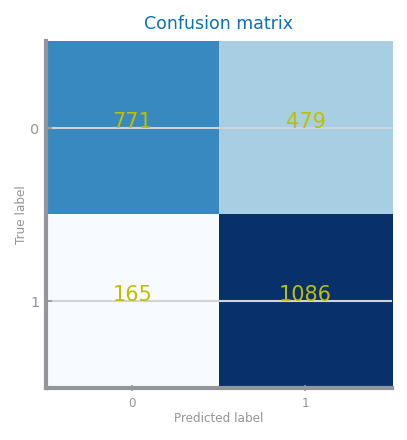

In [9]:
from itertools import product
from numpy import ndarray, set_printoptions, arange
from matplotlib.pyplot import gca, cm
from matplotlib.axes import Axes


def plot_confusion_matrix(cnf_matrix: ndarray, classes_names: ndarray, ax: Axes = None) -> Axes:  # type: ignore
    if ax is None:
        ax = gca()
    title = "Confusion matrix"
    set_printoptions(precision=2)
    tick_marks: ndarray = arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cnf_matrix, interpolation="nearest", cmap=cm.Blues)

    for i, j in product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        ax.text(
            j, i, format(cnf_matrix[i, j], "d"), color="y", horizontalalignment="center"
        )
    return ax


figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()